# Data Discretization

Data discretization is a process in data preprocessing and analysis where continuous data is transformed into discrete form. In other words, it involves partitioning or categorizing a set of continuous values into a finite number of intervals or bins. We can do discretization or binning throught 2 libraries:

- Scikit-learn
- Pandas

##### In this notebook, I covered both ways to do discretization or binning

In [123]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer

In [124]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [125]:
# drop unnecessary columns
df.drop(columns=["class","who","adult_male","deck","embark_town","alive","alone"], inplace=True)

In [126]:
df.isnull().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
dtype: int64

In [127]:
# imputing Embarked column
df["embarked"] = df["embarked"].fillna(df["embarked"].mode()[0])

In [128]:
# imputing Age column
def age_imputation(col):
    age = col[0]
    pclass = col[1]
    if pd.isnull(age):
        if pclass==1:
            return 23
        elif pclass==2:
            return 28
        else:
            return 31
    else:
        return age

df["age"] = df[["age","pclass"]].apply(age_imputation, axis=1)

In [129]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## 1. Using scikit-learn

#### encode = "ordinal", "onehot"

#### =>> encode = "ordinal"

In [67]:
dis = KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="uniform", subsample=None)
df["age_encode"] = dis.fit_transform(df[["age"]])

In [68]:
df.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,age_encode
174,0,1,male,56.0,0,0,30.6958,C,3.0
778,0,3,male,31.0,0,0,7.7375,Q,1.0
627,1,1,female,21.0,0,0,77.9583,S,1.0
20,0,2,male,35.0,0,0,26.0000,S,2.0
222,0,3,male,51.0,0,0,8.0500,S,3.0


<Axes: xlabel='age_encode', ylabel='Count'>

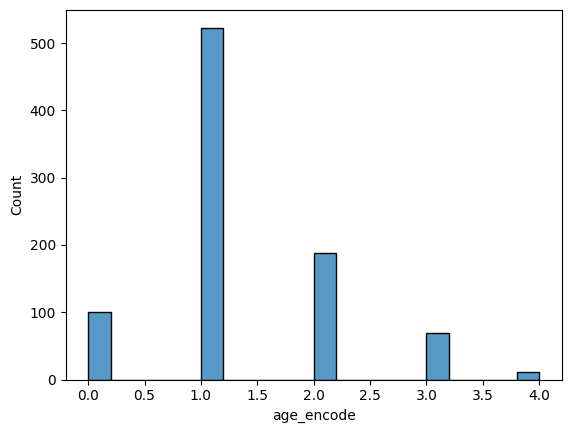

In [69]:
sns.histplot(x=df["age_encode"])

#### =>> encode = "onehot"

In [70]:
dis = KBinsDiscretizer(n_bins=5, encode="onehot", strategy="uniform", subsample=None)
# it will return array
onehot_encode = dis.fit_transform(df[["age"]])

In [71]:
onehot_encode

<891x5 sparse matrix of type '<class 'numpy.float64'>'
	with 891 stored elements in Compressed Sparse Row format>

In [72]:
df = pd.concat([df, pd.DataFrame(onehot_encode, columns=["age_encoded"])], axis=1)
df.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,age_encode,age_encoded
871,1,1,female,47.0,1,1,52.5542,S,2.0,"(0, 2)\t1.0"
51,0,3,male,21.0,0,0,7.8000,S,1.0,"(0, 1)\t1.0"
193,1,2,male,3.0,1,1,26.0000,S,0.0,"(0, 0)\t1.0"
597,0,3,male,49.0,0,0,0.0000,S,3.0,"(0, 3)\t1.0"
172,1,3,female,1.0,1,1,11.1333,S,0.0,"(0, 0)\t1.0"


#### strategy = "uniform, quantile, kmeans"

#### =>> strategy = "uniform" ---- It create bins of equal width

In [84]:
# remove encode changes from dataset, so that it's will easy to identify new changes
dis = KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="uniform", subsample=None)
df["age_encoded"] = dis.fit_transform(df[["age"]])

In [85]:
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,age_encoded
0,0,3,male,22.0,1,0,7.2500,S,1.0
1,1,1,female,38.0,1,0,71.2833,C,2.0
2,1,3,female,26.0,0,0,7.9250,S,1.0
3,1,1,female,35.0,1,0,53.1000,S,2.0
4,0,3,male,35.0,0,0,8.0500,S,2.0


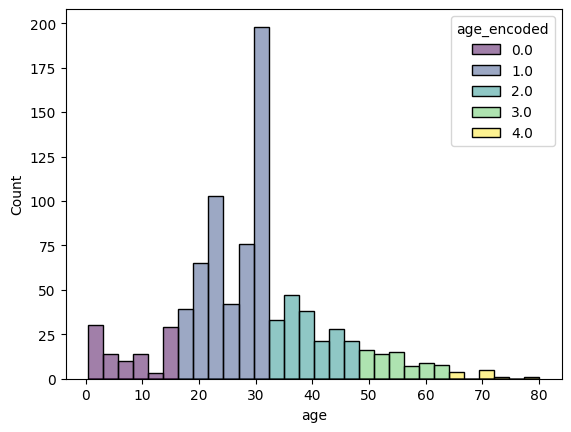

In [87]:
sns.histplot(x=df["age"], hue=df["age_encoded"], palette="viridis")
plt.show()

#### =>> strategy = "quantile" ----- It create bins with the same number of points in each bin

In [96]:
# remove encode changes from dataset, so that it's will easy to identify new changes
dis = KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="quantile", subsample=None)
df["age_encoded"] = dis.fit_transform(df[["age"]])

In [97]:
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,age_encoded
0,0,3,male,22.0,1,0,7.2500,S,1.0
1,1,1,female,38.0,1,0,71.2833,C,4.0
2,1,3,female,26.0,0,0,7.9250,S,1.0
3,1,1,female,35.0,1,0,53.1000,S,3.0
4,0,3,male,35.0,0,0,8.0500,S,3.0


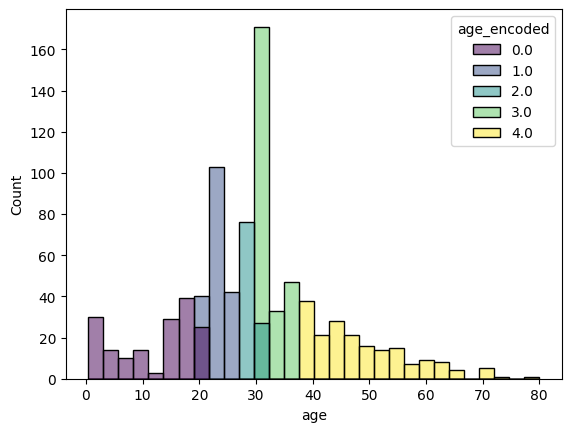

In [98]:
sns.histplot(x=df["age"], hue=df["age_encoded"], palette="viridis")
plt.show()

#### =>> strategy = "kmeans" ----- It use kmeans clustering to define bin edges.

In [105]:
dis = KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="kmeans", subsample=None)
df["age_encode"] = dis.fit_transform(df[["age"]])

In [106]:
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,age_encode
0,0,3,male,22.0,1,0,7.2500,S,1.0
1,1,1,female,38.0,1,0,71.2833,C,2.0
2,1,3,female,26.0,0,0,7.9250,S,1.0
3,1,1,female,35.0,1,0,53.1000,S,2.0
4,0,3,male,35.0,0,0,8.0500,S,2.0


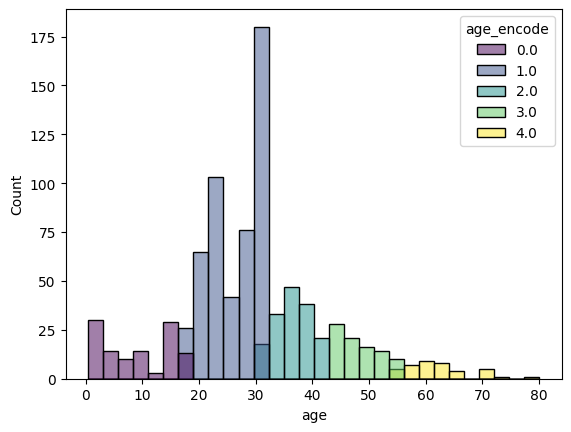

In [108]:
sns.histplot(x=df["age"], hue=df["age_encode"], palette="viridis")
plt.show()

## 2. Using Pandas

In [121]:
# Through bydefault binning, pandas automatically do this
df["age_encoded"] = pd.cut(df["age"], bins=3, labels=[111,222,333])
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,age_encoded
0,0,3,male,22.0,1,0,7.2500,S,111
1,1,1,female,38.0,1,0,71.2833,C,222
2,1,3,female,26.0,0,0,7.9250,S,111
3,1,1,female,35.0,1,0,53.1000,S,222
4,0,3,male,35.0,0,0,8.0500,S,222


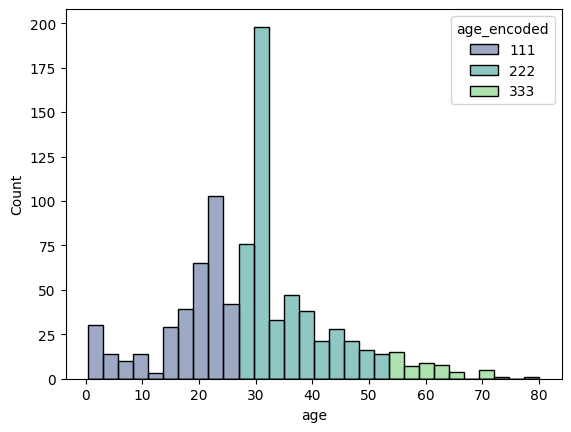

In [122]:
sns.histplot(x=df["age"], hue=df["age_encoded"], palette="viridis")
plt.show()

In [130]:
# manually binning
bins = [0, 40, 50, 60, 70, 80]
labels = ["Young", "Baba_1", "Baba_2", "Baba_3", "Baba_4"]

df["age_encoded"] = pd.cut(df["age"], bins=bins, labels=labels)
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,age_encoded
0,0,3,male,22.0,1,0,7.2500,S,Young
1,1,1,female,38.0,1,0,71.2833,C,Young
2,1,3,female,26.0,0,0,7.9250,S,Young
3,1,1,female,35.0,1,0,53.1000,S,Young
4,0,3,male,35.0,0,0,8.0500,S,Young


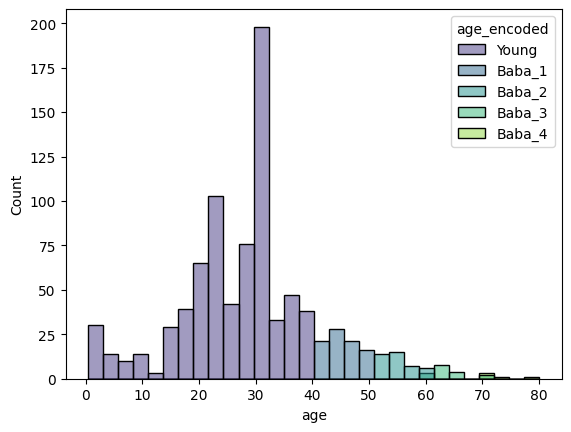

In [131]:
sns.histplot(x=df["age"], hue=df["age_encoded"], palette="viridis")
plt.show()

## Conclusion:

We use both methods to discrete the numerical data into categorical labels. From methods are good, we can use both to do discretization task.